# Problem Set 1
This problem set is largely based off of the application problems in the applied excercises in ISLR in chapters 2,3,10

In [2]:
# use this cell to import the modules you will be using
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import numpy as np

## Chapter 2

### 8
This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US. The variables are  
* Private : Public/private indicator  
* Apps : Number of applications received  
* Accept : Number of applicants accepted  
* Enroll : Number of new students enrolled  
* Top10perc : New students from top 10 % of high school class  
* Top25perc : New students from top 25 % of high school class  
* F.Undergrad : Number of full-time undergraduatesP.Undergrad : Number of part-time undergraduates  
* Outstate : Out-of-state tuition  
* Room.Board : Room and board costs  
* Books : Estimated book costs  
* Personal : Estimated personal spending  
* PhD : Percent of faculty with Ph.D.’s  
* Terminal : Percent of faculty with terminal degree  
* S.F.Ratio : Student/faculty ratio  
* perc.alumni : Percent of alumni who donate  
* Expend : Instructional expenditure per student  
* Grad.Rate : Graduation rate  
Before reading the data into python, it can be viewed in Excel or a text editor is well.

### (a)
Use the pandas read_csv() function to read the data into python. Call the loaded data df. Make sure that you have the directory set to the correct location for the data or use the absolute filepath so the program knows where to look for the file. Use df.head() to show the first 10 observations of the data

In [3]:
df = pd.read_csv(r'C:\Users\ben1c\Projects\Econ 484\Homework\College.csv')
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### (b)
Read in the data again this time calling the data college and using the parameter index_col=0 in the read_csv function. Notice the difference between the index attributes 

In [4]:
df = pd.read_csv(r'C:\Users\ben1c\Projects\Econ 484\Homework\College.csv', index_col=0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### (c)
Now we will do some prelimainary analysis and visualizations of the data that was loaded  
$\mathbf{i)}$ Use the describe method of the dataframe object that you made by reading in the data to show the summary statistics of each of the columns

In [5]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


$\mathbf{ii)}$ Use the scatter_matrix function that was imported from pandas to produce scatter plots of the pairwise combinations of 6 of the variables of your choice. Try adjusting the figsize parameter make the displayed fill the area of the display under the cell while keeping it looking nice

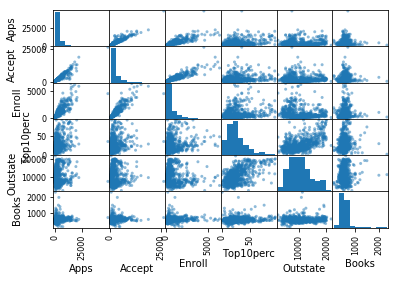

In [6]:
# call the function above these lines, these will make it cleaner and display the image

six = pd.DataFrame(df, columns=['Apps', 'Accept', 'Enroll', 'Top10perc', 'Outstate', 'Books'])
scatter_matrix(six)
# plt.rcParams['figure.figsize'] = [20, 10]
# plt.tight_layout()
plt.show()

$\mathbf{iii)}$ Use seaborn's boxplot function to create a boxplot of Outstate on private.  
Hint: You can either pass in the columns as objects or the names of the columns and use data=college as a parameter

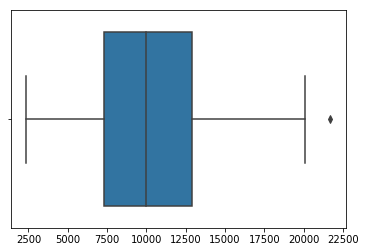

In [7]:
OP = pd.DataFrame(df, columns=['Outstate', 'private'])

sns.boxplot(OP)

$\mathbf{iv)}$  Create a new qualitative variable, called Elite, by binning the Top10perc variable. We are going to divide universities into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50 %.

In [8]:
df['Elite'] = np.where(df['Top10perc']>50, 1, 0)

Get a count of how many universities are in the 'Elite' category. Now make boxplot of Outstate versus Elite.

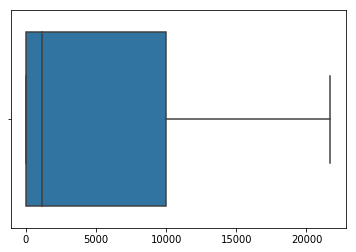

In [9]:
df['Elite'].sum() # = 78

OE = pd.DataFrame(df, columns=['Outstate', 'Elite'])
sns.boxplot(OE)

$\mathbf{v)}$ Use seaborn's distplot function to produce some histograms with differing numbers of bins for a few of the quantitative variables.

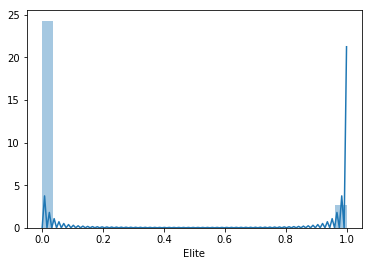

In [10]:
sns.distplot(df['Elite'], bins=None) #Binary

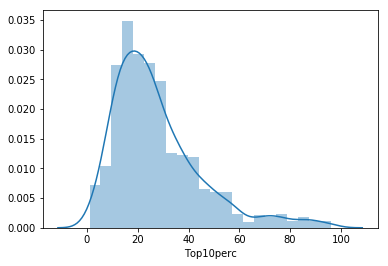

In [11]:
sns.distplot(df['Top10perc'], bins=None) #Continuous

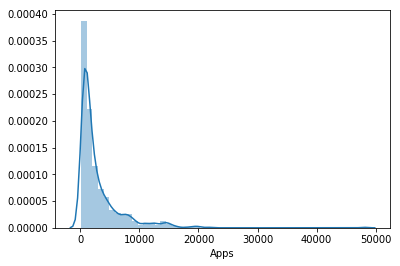

In [12]:
sns.distplot(df['Apps'], bins=None) #Continuous

You can create a grid of histograms with the hist method of the dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002339C6B6DD8>,
      dtype=object)

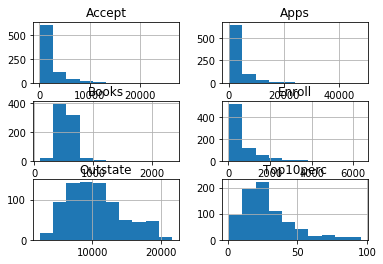

In [13]:
six.hist()

Using the tools that were introduced and/or other ones you find, continue exploring the data set and write a brief summary of what you find. This should involve something you do that was not a part of the previous responses.

In [14]:
X = six.loc[:,['Apps']]
y = six['Accept']
reg_obj = sm.OLS(y,X)
results = reg_obj.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Accept   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                          1.054e+04
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                        0.00
Time:                        16:34:29   Log-Likelihood:                         -6326.3
No. Observations:                 777   AIC:                                  1.265e+04
Df Residuals:                     776   BIC:                                  1.266e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

It seems that Apps is correlated to Acceptance on its own but lets see what happens if we include the other variables in the regression

In [15]:
X = six.loc[:,['Apps', 'Enroll', 'Top10perc', 'Outstate', 'Books']]
y = six['Accept']
reg_obj = sm.OLS(y,X)
results = reg_obj.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Accept   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              4864.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                        0.00
Time:                        16:34:29   Log-Likelihood:                         -6014.8
No. Observations:                 777   AIC:                                  1.204e+04
Df Residuals:                     772   BIC:                                  1.206e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Apps is still correlated even with including the other variables that might have been skewing the effect in the previous regression since they weren't included.

## Chapter 3
$\mathbf{a)}$Load in auto.csv as a dataframe and the produce a grid of the pairwise scatterplots of the variables of the dataframe

In [16]:
df = pd.read_csv(r'C:\Users\ben1c\Projects\Econ 484\Homework\Auto.csv')

$\mathbf{b)}$ Show the correlation matrix. There are several ways to do this but you should be able to find a function that makes it for the numeric variables of a dataframe.

In [17]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


In [18]:
auto = df
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [19]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

I ignore horsepower because it contains non int values

$\mathbf{c)}$ Use the statsmodel OLS function to perform a linear regression with mpg as the response and year as a feature. Use the summary() method to print the results. 

In [20]:
# fill in the variable names you plan on using in the regression
X = auto.loc[:,['year']]
y = auto['mpg']
reg_obj = sm.OLS(y,X)
results = reg_obj.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              4281.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                   2.07e-214
Time:                        16:34:30   Log-Likelihood:                         -1347.6
No. Observations:                 397   AIC:                                      2697.
Df Residuals:                     396   BIC:                                      2701.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Do a linear regression with mpg as the outcome and all other variables except name as the predictors. Comment on the output. For instance:  
i. Is there a relationship between the predictors and the response?  
ii. Which predictors appear to have a statistically significant relationship to the response?  
iii. What does the coefficient for the year variable suggest?

In [21]:
X = auto.loc[:,['year', 'cylinders', 'displacement', 'weight', 'acceleration', 'origin']]
#there is a question mark somewhere in the data find it and replace it

In [22]:
y = auto['mpg']
reg_obj = sm.OLS(y,X.astype(float))
results = reg_obj.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              3393.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                        0.00
Time:                        16:34:30   Log-Likelihood:                         -1049.3
No. Observations:                 397   AIC:                                      2111.
Df Residuals:                     391   BIC:                                      2135.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

$\mathbf{d)}$ Use statsmodels' inluence_plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

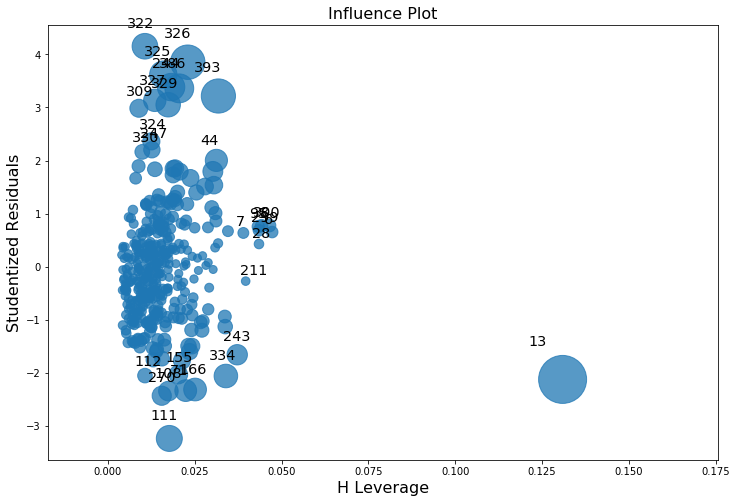

In [23]:
fig, ax = plt.subplots(figsize=(12,8))

fig = sm.graphics.influence_plot(results, ax=ax, critertion='cooks')

$\mathbf{e)}$ Create some polynomial and interaction features from the existing set of variables and fit linear regression models with them. Do any interaction terms appear to be statistically significant? What about polynomial terms?  
You may want to look into sklearn's PatsyTransformer if you are going to create a lot but this  is not necessary

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

X_poly = poly_reg.fit_transform(X)
polyreg = sm.OLS(y, X_poly).fit()

print(polyreg.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1504.
Date:                Mon, 23 Sep 2019   Prob (F-statistic):                        0.00
Time:                        16:34:32   Log-Likelihood:                         -955.85
No. Observations:                 397   AIC:                                      1954.
Df Residuals:                     376   BIC:                                      2037.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Chapter 10
## PCA
In the first cell I have some code which will generate some random data with 500 features and 10000 observations. There will be 3 clusters of groups indicated by the y variable. Use PCA to reduce the dimensionality down to 2 principle components. Sklearn has a PCA and TruncatedSVD object you can use, the difference will just be demaning the values or not so there shouldn't be a big difference in results.

In [70]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

SEED = 123
X, y = make_blobs(n_samples=1000, n_features=5000, cluster_std=90., random_state=SEED)

In [71]:
x = X

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf['y'] = y

Generate a plot of the 2 principal components that were found. You may find it helpful to combine X and y into a pandas DataFrame object so that it plays mroe nicely with seaborn.

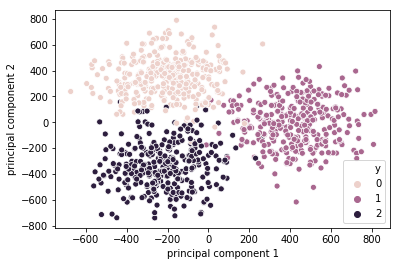

In [72]:
sns.scatterplot(x='principal component 1', y='principal component 2', hue='y', data = principalDf)

## KMeans
In order to prevent overfitting, we can split the data into to groups of data for training and some for the validating of our model, often called test. An easy way to divide this is to use sklearn's traintestsplit function. Use the larger portion fo your data for training and the smaller set for the validation.

In [73]:
from sklearn.model_selection import train_test_split # Skip

Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? You can use the classifcation report function from skelarn to get some metrics that measure the quality of the model you used.

In [74]:
df = pd.DataFrame(x)
df = df.rename(columns = {"0":"zero"})
#making sure I only have numeric data 
numeric_features = df.select_dtypes(include=[np.number])

#kmeans with three clusters 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, n_init=50, n_jobs=-1)
kmeans.fit(df)
sk_clusters = kmeans.predict(df)

labels = kmeans.labels_
print(silhouette_score(df, labels, metric='euclidean'))

9.243741402171193e-05


Perform K-means clustering with K = 2. Describe your results.

In [75]:
kmeans = KMeans(n_clusters=2, n_init=50, n_jobs=-1)
kmeans.fit(df)
sk_clusters = kmeans.predict(df)

labels = kmeans.labels_
print(silhouette_score(df, labels, metric='euclidean'))

0.0003402043497584014


The silhouette score went up a little bit but not much. This is essentially useless information.

Now perform K-means clustering with K = 4, and describe your results.

In [76]:
kmeans = KMeans(n_clusters=4, n_init=50, n_jobs=-1)
kmeans.fit(df)
sk_clusters = kmeans.predict(df)

labels = kmeans.labels_
print(silhouette_score(df, labels, metric='euclidean'))

-0.0004456888051325498


Not a significant change. We want to get it up to a 1 but we can't get that right now probably because the data isn't scaled.

Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [77]:
pca = PCA(n_components=2)


pca.fit(x) 
X_pca = pca.transform(x)
print("Original shape: {}".format(str(x.shape)))
print("PCA Shape: {}".format(str(X_pca.shape)))

kmeans = KMeans(n_clusters=3, n_init=50, n_jobs=-1)
kmeans.fit(X_pca)
sk_clusters = kmeans.predict(X_pca)

labels = kmeans.labels_
print(silhouette_score(X_pca, labels, metric='euclidean'))

Original shape: (1000, 5000)
PCA Shape: (1000, 2)
0.5780727687135588


That helped a ton!! Using PCA beforehand is great because KMeans is just looking at the top two explainors of variation so it can ignore a lot of the noise in the data.

Using of of sklearn's data scalers, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [79]:
x = StandardScaler().fit_transform(X)



kmeans = KMeans(n_clusters=3, n_init=50, n_jobs=-1)
kmeans.fit(x)
sk_clusters = kmeans.predict(x)

labels = kmeans.labels_
print(silhouette_score(x, labels, metric='euclidean'))

8.378206845596952e-05


Scaling the data without using PCA didn't work super well. Its basically just as bad as it was before. Using PCA was definitely the best option.